In [89]:
import json
import pickle
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from glob import glob

sns.set_style("darkgrid")

In [90]:
#### Settings
### Learning Rate for 2NN = 0.1
### Learning Rate for CNN = 0.01

In [91]:
os.chdir("/home/bahy/research/icl-prelab-assignment/")

In [92]:
!pwd

/home/bahy/research/icl-prelab-assignment


In [93]:
datas = []
for file_name in glob("logs/*.txt"):
    print(file_name)
    file = open(file_name, "rb")
    for data in file.readlines():
        if len(data) < 10: # Ignoring blank space/not useful information
            continue
        dict_data = eval(data)
        dict_data['setting'] = file_name.split("/")[1].split("-")[0]
        dict_data['model'] = file_name.split("/")[1].split("-")[-1].split(".")[0]
        datas.append(dict_data)
        
datas = pd.DataFrame(datas)

logs/NONIID-B10-C1.0-MNIST-2NN.txt
logs/IID-B600-C0.1-MNIST-2NN.txt
logs/NONIID-B10-C0.0-MNIST-CNN.txt
logs/NONIID-B10-C0.1-MNIST-CNN.txt
logs/IID-B10-C0.1-MNIST-2NN.txt
logs/IID-B600-C0.0-MNIST-2NN.txt
logs/IID-B600-C1.0-MNIST-CNN.txt
logs/NONIID-B10-C0.1-MNIST-2NN.txt
logs/NONIID-B10-C0.0-MNIST-2NN.txt
logs/IID-B600-C0.0-MNIST-CNN.txt
logs/NONIID-B600-C0.1-MNIST-2NN.txt
logs/IID-B10-C1.0-MNIST-CNN.txt
logs/IID-B10-C0.0-MNIST-2NN.txt
logs/NONIID-B600-C0.1-MNIST-CNN.txt
logs/NONIID-B600-C0.0-MNIST-2NN.txt
logs/IID-B10-C0.0-MNIST-CNN.txt
logs/IID-B600-C0.1-MNIST-CNN.txt
logs/NONIID-B600-C0.0-MNIST-CNN.txt
logs/IID-B10-C0.1-MNIST-CNN.txt
logs/IID-B10-C1.0-MNIST-2NN.txt


In [94]:
# Sort the data
ROUNDING_DIGIT = 4

df_metrics = datas.sort_values(by=['setting', 'B', 'C', 'comm_round']).reset_index(drop=True)
df_metrics['train_acc'] = df_metrics['train_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_acc'] = df_metrics['test_acc'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['train_loss'] = df_metrics['train_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics['test_loss'] = df_metrics['test_loss'].apply(lambda x: round(x, ROUNDING_DIGIT))
df_metrics.head()

C   B  comm_round  train_acc  test_acc  train_loss  test_loss setting  \
0  0.0  10           1     0.7448    0.7448      4.0410     4.0120     IID   
1  0.0  10           1     0.8952    0.8988      1.6601     1.5963     IID   
2  0.0  10           2     0.8134    0.8164      2.9616     2.9090     IID   
3  0.0  10           2     0.9079    0.9117      1.4647     1.3977     IID   
4  0.0  10           3     0.8047    0.8138      3.0942     2.9425     IID   

  model  
0   2NN  
1   CNN  
2   2NN  
3   CNN  
4   2NN

In [95]:
df_metrics.tail()

C    B  comm_round  train_acc  test_acc  train_loss  test_loss  \
20790  0.1  600        2172     0.9769    0.9698      0.3633     0.4803   
20791  0.1  600        2173     0.9774    0.9694      0.3567     0.4809   
20792  0.1  600        2174     0.9776    0.9693      0.3532     0.4873   
20793  0.1  600        2175     0.9776    0.9693      0.3530     0.4849   
20794  0.1  600        2176     0.9778    0.9701      0.3496     0.4740   

      setting model  
20790  NONIID   2NN  
20791  NONIID   2NN  
20792  NONIID   2NN  
20793  NONIID   2NN  
20794  NONIID   2NN

In [96]:
df_metrics.groupby(["model", "setting", "B", "C"]).size()

model  setting  B    C  
2NN    IID      10   0.0     127
                     0.1      53
                     1.0      45
                600  0.0    2449
                     0.1    2526
       NONIID   10   0.0    2764
                     0.1    1138
                     1.0    1176
                600  0.0    2620
                     0.1    2176
CNN    IID      10   0.0      23
                     0.1      13
                     1.0      13
                600  0.0     449
                     0.1     402
                     1.0     426
       NONIID   10   0.0     735
                     0.1     922
                600  0.0    1118
                     0.1    1620
dtype: int64

In [97]:
FIG_SIZE = (12,5)
DASHES = (5, 10)

In [98]:
# Plot function for accuracy
def plot_accuracy(model, setting, B, C):
    current_case = df_metrics[(df_metrics['model'] == model) & (df_metrics['setting'] == setting) & (df_metrics['C'] == C) & (df_metrics['B'] == B)]
    if len(current_case) == 0:
        return "B=%s, C=%s combination does not exists" % (B,C)

    plt.figure(figsize=FIG_SIZE)

    sns.lineplot(data=current_case, x='comm_round', y='train_acc', label='train_accuracy',\
                 dashes=(5, 20))
    sns.lineplot(data=current_case, x='comm_round', y='test_acc', label='test_accuracy',\
                 dashes=(5, 20))
    plt.axhline(y=0.97, color='grey', linestyle='--', label = "97% Accuracy")

    plt.ylim(max(current_case['train_acc'].min(), current_case['test_acc'].min()), None)
    plt.ylabel("Accuracy")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST %s %s\nB=%s, C=%s" % (model, setting, B, C))
    plt.legend(loc='lower right')
    plt.show()

In [99]:
# Plot function for loss
def plot_loss(model, setting, B, C):
    current_case = df_metrics[(df_metrics['model'] == model) & (df_metrics['setting'] == setting) & (df_metrics['C'] == C) & (df_metrics['B'] == B)]
    if len(current_case) == 0:
        return "B=%s, C=%s combination does not exists" % (B,C)
    
    plt.figure(figsize=FIG_SIZE)

    sns.lineplot(data=current_case, x='comm_round', y='train_loss', label='train_loss',\
                 dashes=DASHES)
    sns.lineplot(data=current_case, x='comm_round', y='test_loss', label='test_loss',\
                 dashes=DASHES)
    
    plt.ylim(None, min(current_case['train_loss'].max(), current_case['test_loss'].max()))
    plt.ylabel("Loss")
    plt.xlabel("Communication Rounds")
    plt.title("MNIST %s %s\nB=%s, C=%s" % (model, setting, B, C))
    plt.legend(loc='upper right')
    plt.show()

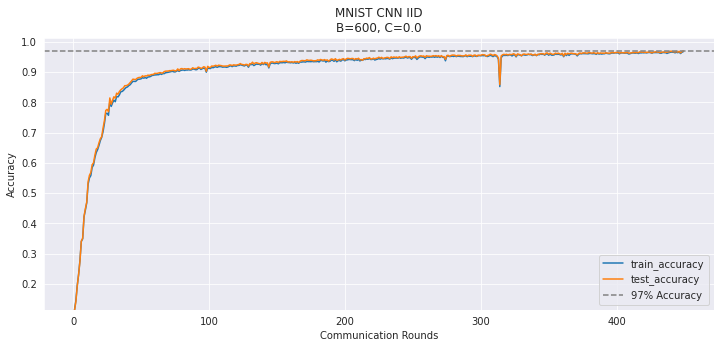

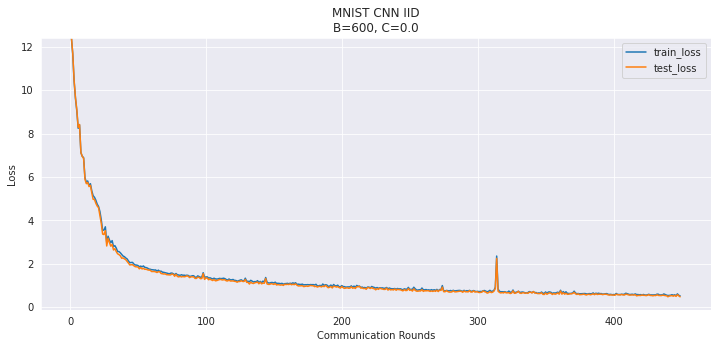

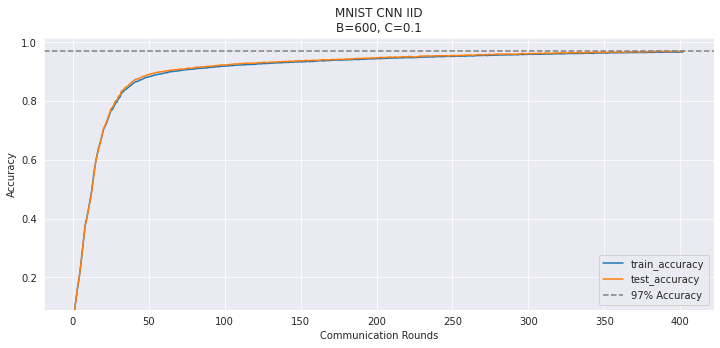

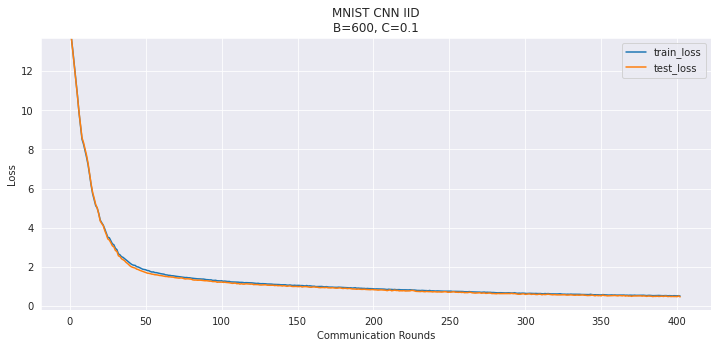

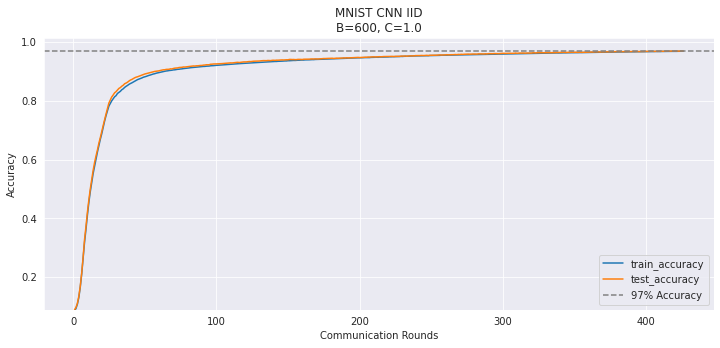

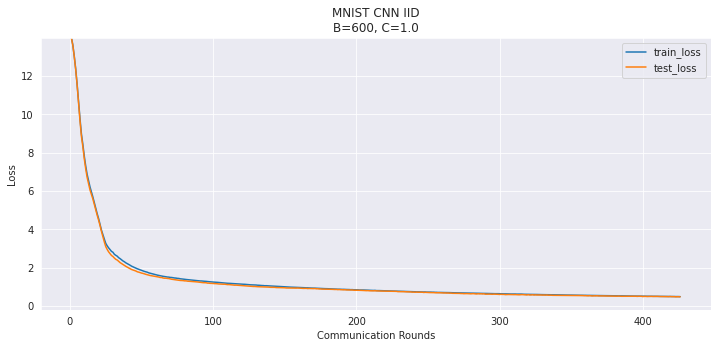

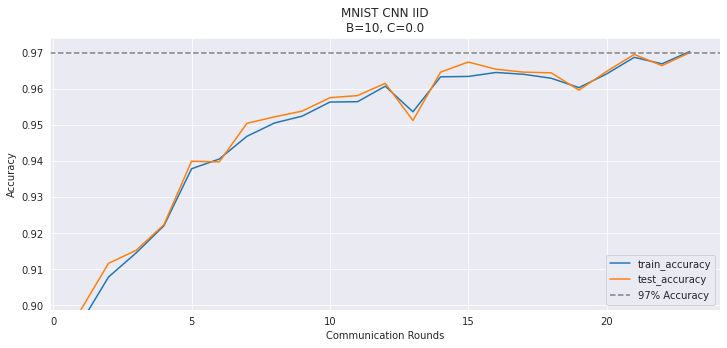

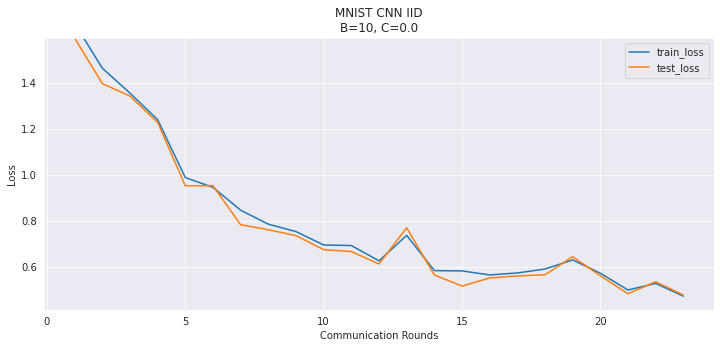

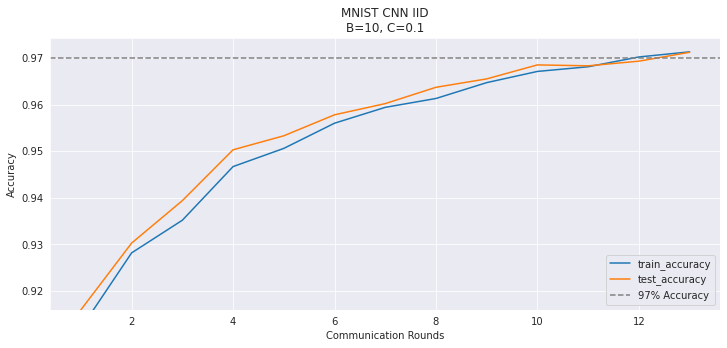

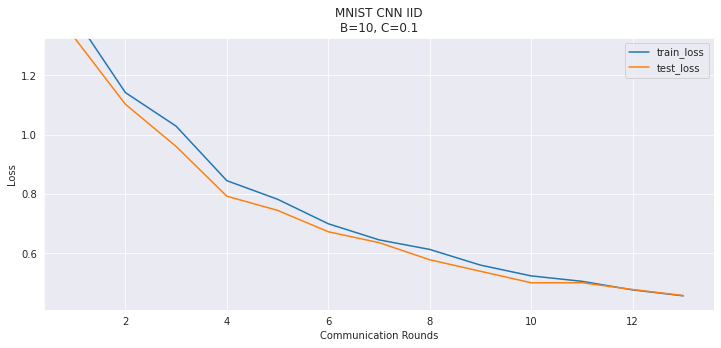

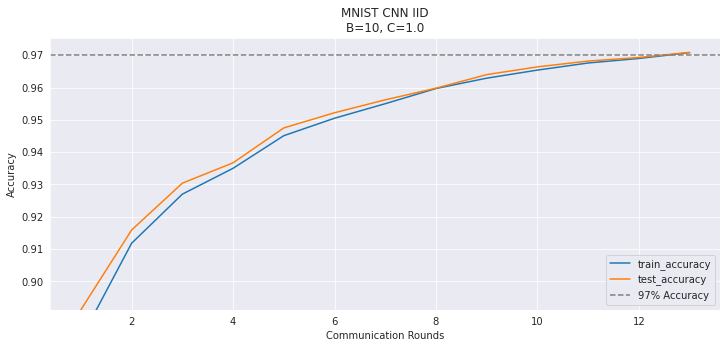

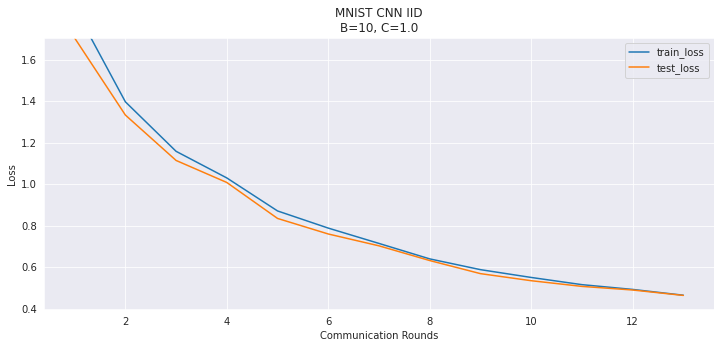

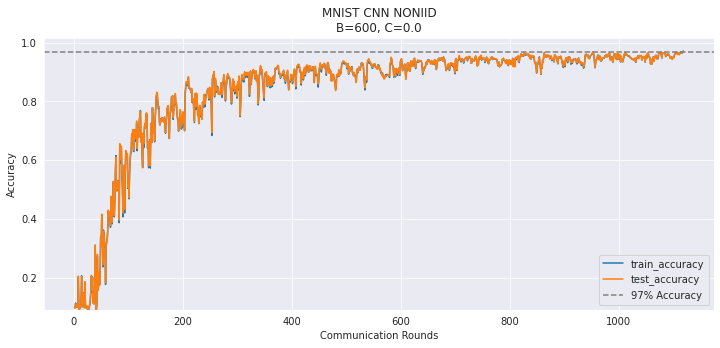

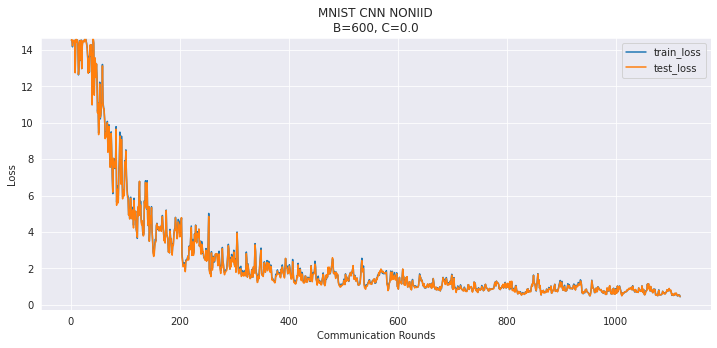

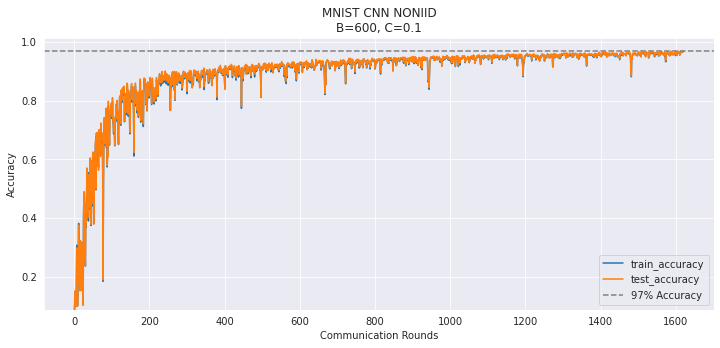

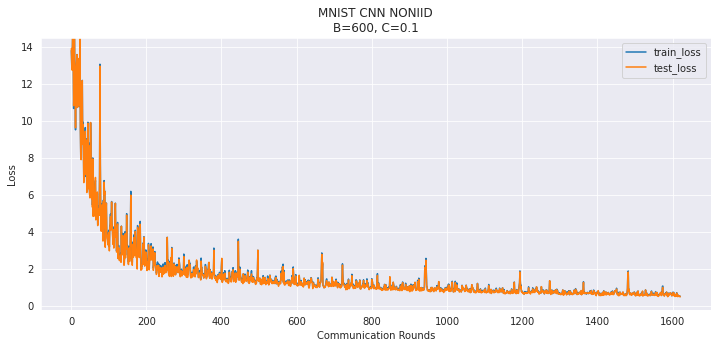

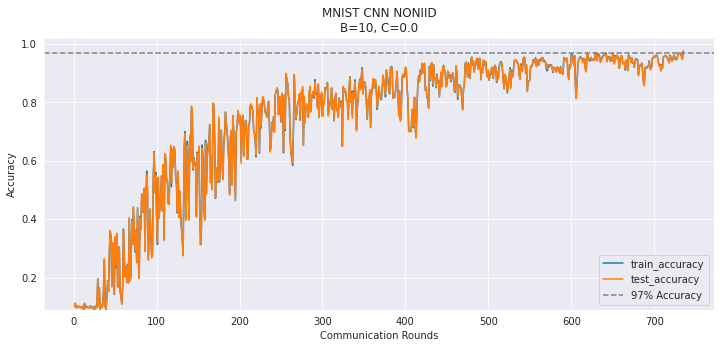

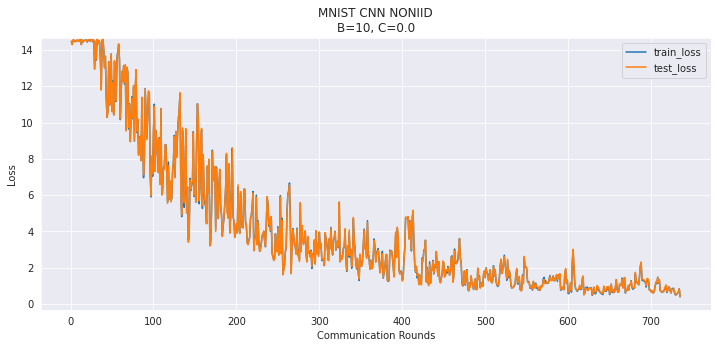

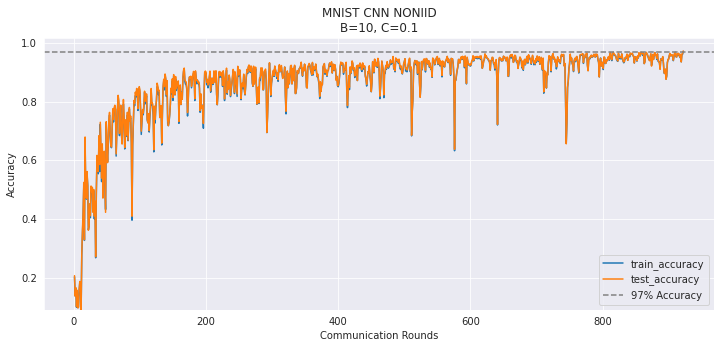

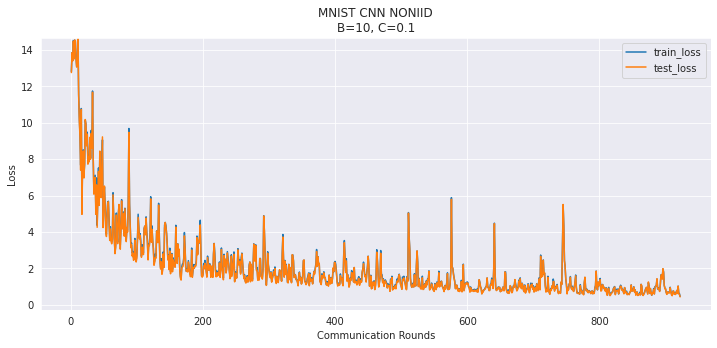

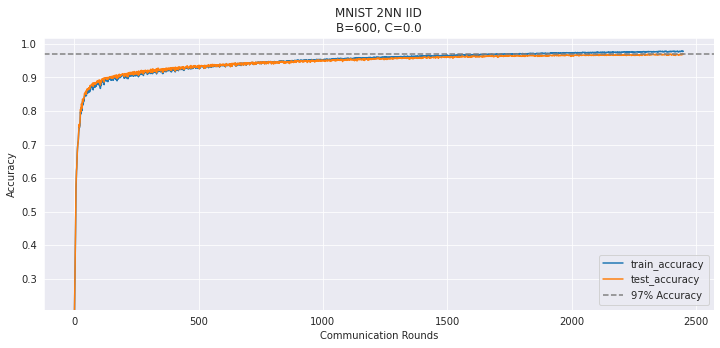

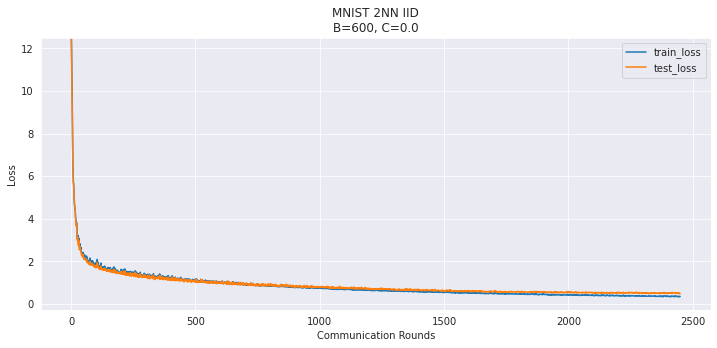

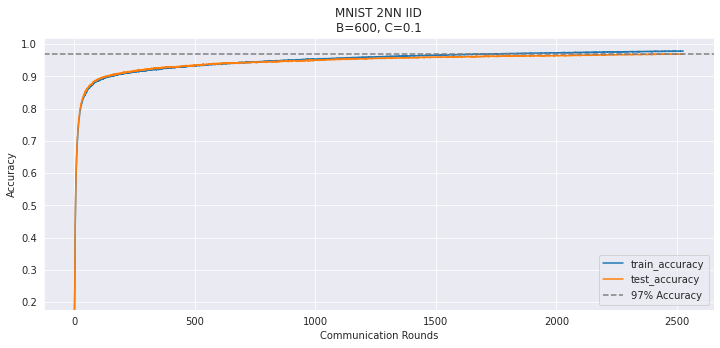

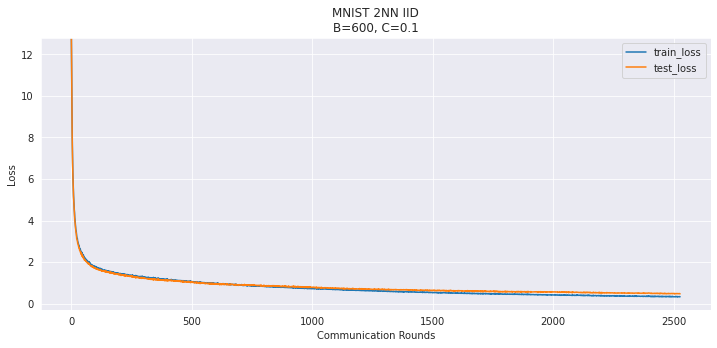

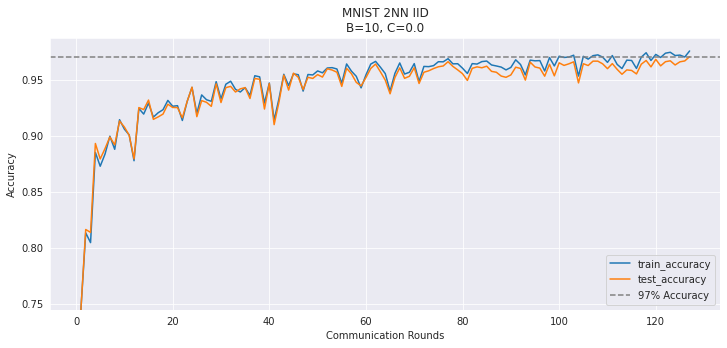

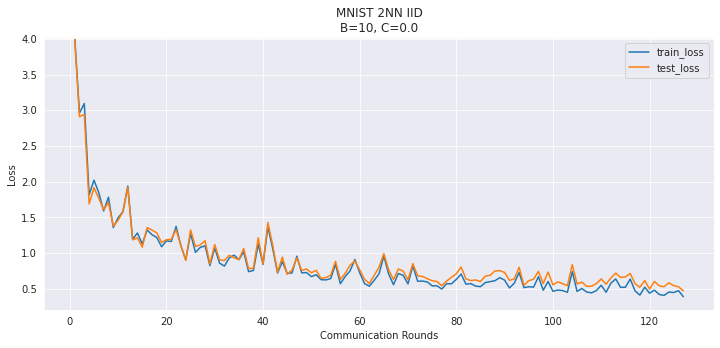

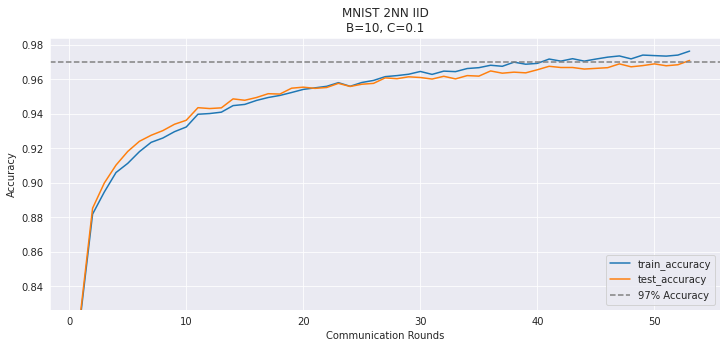

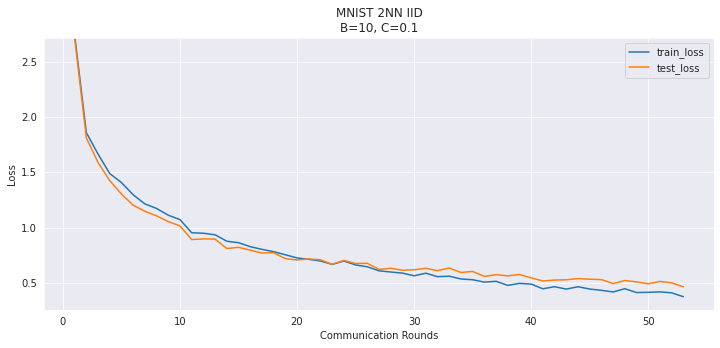

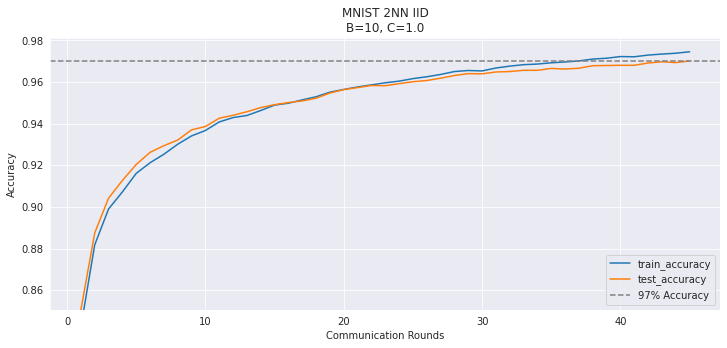

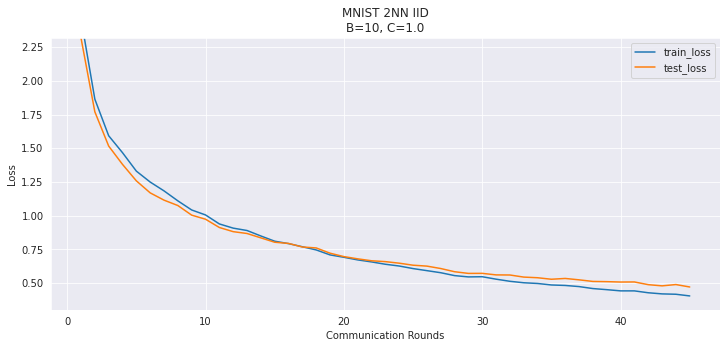

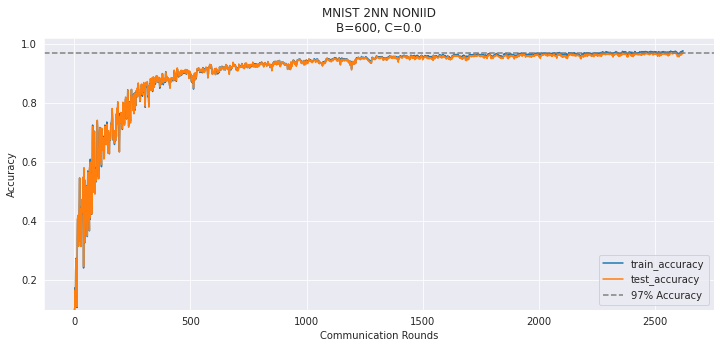

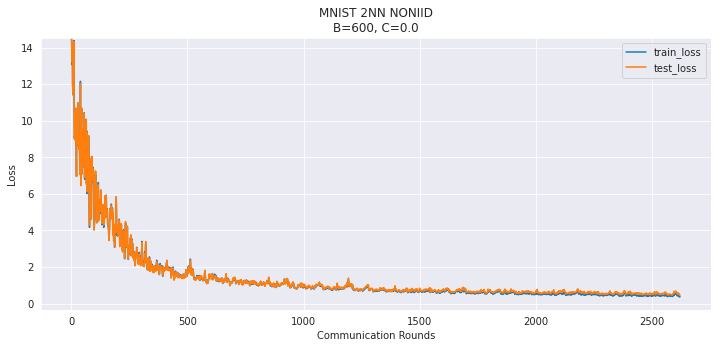

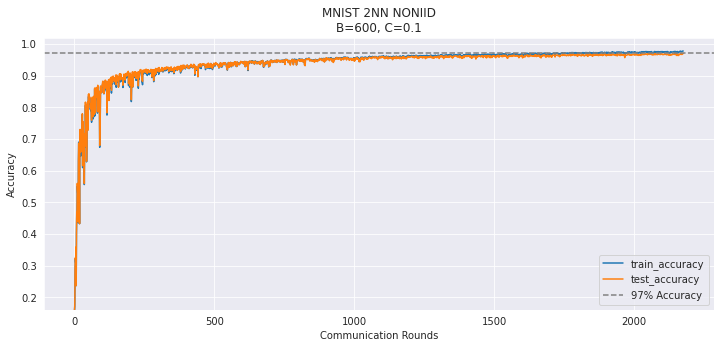

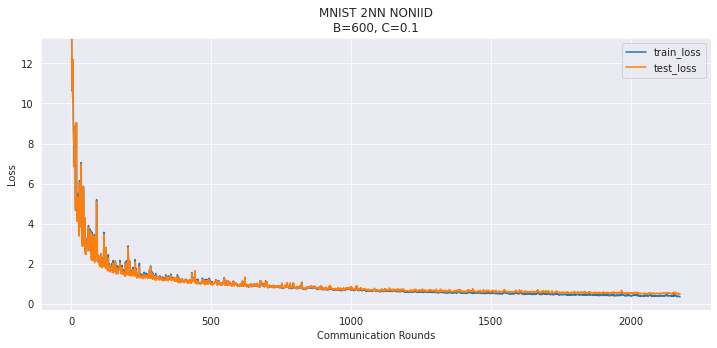

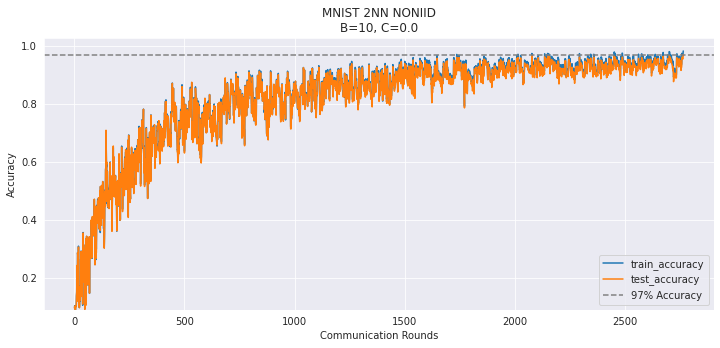

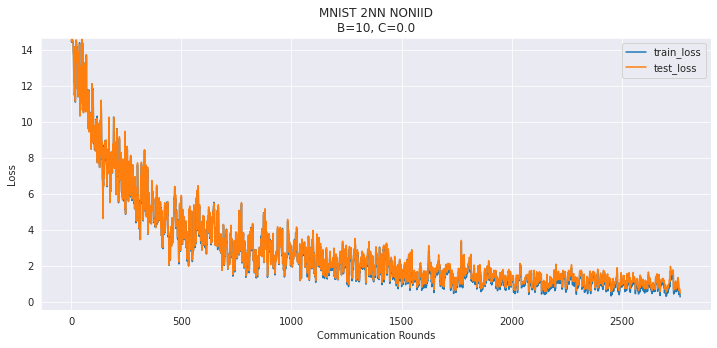

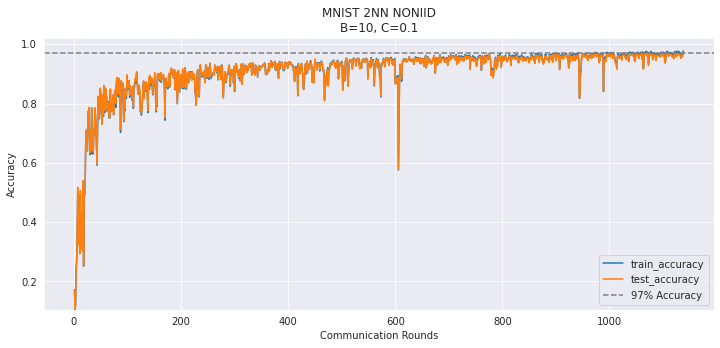

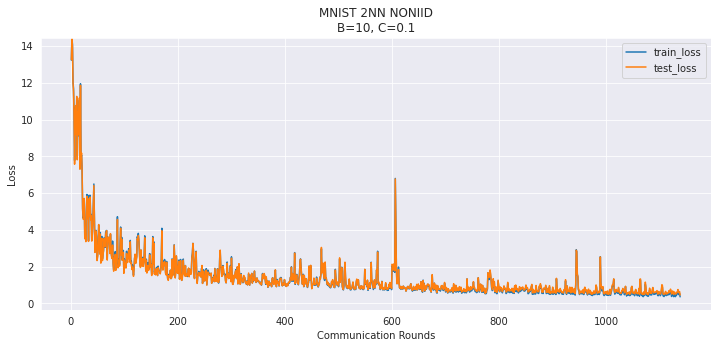

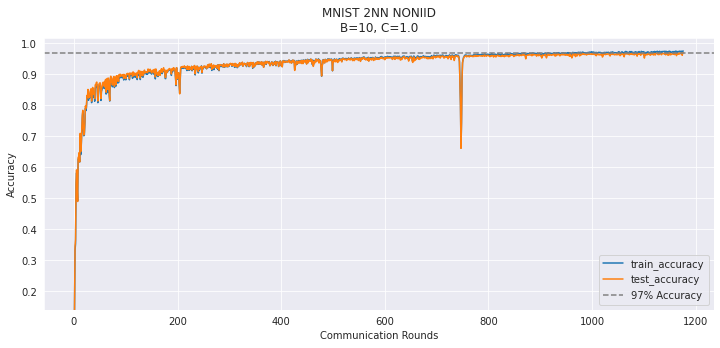

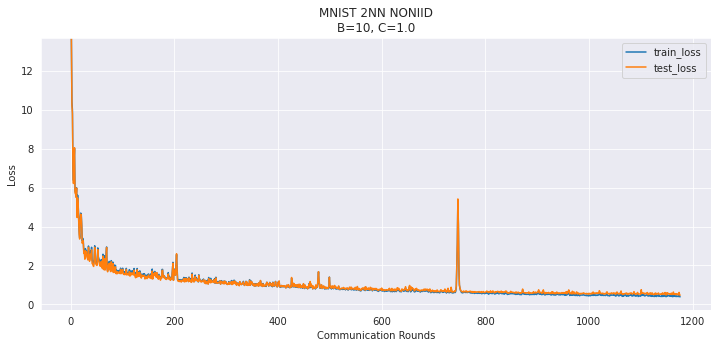

In [100]:
# Plot all accuracy and losses
MODELS = ["CNN", "2NN"]
SETTINGS = ["IID", "NONIID"]
BATCHES = [600, 10]
C_FRACTIONS = [0.0, 0.1, 1.0]

for model in MODELS:
    for setting in SETTINGS:
        for b in BATCHES:
            for c in C_FRACTIONS:
                plot_accuracy(model, setting, b, c)
                plot_loss(model, setting, b, c)